In [1]:
import pandas as pd

# Load the dataset
data = pd.read_csv('syracuse_requests.csv')
print("Dataset loaded successfully.")

# Convert 'Created_at_local' and 'Closed_at_local' into datetime objects
data['Created_at_local'] = pd.to_datetime(data['Created_at_local'], errors='coerce')
data['Closed_at_local'] = pd.to_datetime(data['Closed_at_local'], errors='coerce')
print("Date columns converted to datetime format.")

# Check for any conversion issues and basic dataframe info
print(data.info())

# Display the first few rows to confirm changes
print(data.head())


Dataset loaded successfully.


/var/folders/p3/9s4dt0cj7t9cx3md223g8wh40000gn/T/ipykernel_13876/4122532589.py:8: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  data['Created_at_local'] = pd.to_datetime(data['Created_at_local'], errors='coerce')


Date columns converted to datetime format.
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 60208 entries, 0 to 60207
Data columns (total 23 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   X                        60113 non-null  float64       
 1   Y                        60113 non-null  float64       
 2   Id                       60208 non-null  int64         
 3   Summary                  60208 non-null  object        
 4   Rating                   60208 non-null  int64         
 5   Address                  60113 non-null  object        
 6   Description              54580 non-null  object        
 7   Agency_Name              60208 non-null  object        
 8   Request_type             60208 non-null  int64         
 9   URL                      60208 non-null  object        
 10  Lat                      60113 non-null  float64       
 11  Lng                      60113 non-null  float64  

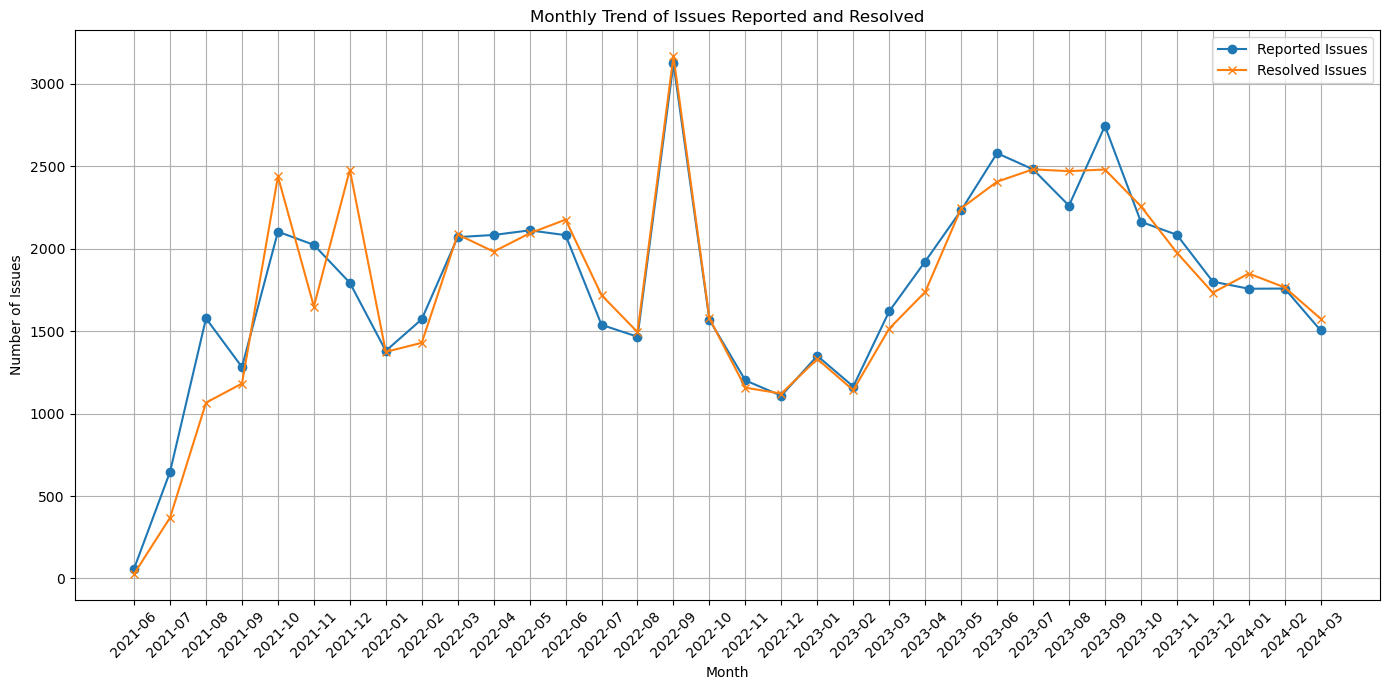

Monthly Reported Issues:
 Created_at_local
2021-06      60
2021-07     647
2021-08    1577
2021-09    1282
2021-10    2103
Freq: M, Name: count, dtype: int64
Monthly Closed Issues:
 Closed_at_local
2021-06      28
2021-07     369
2021-08    1066
2021-09    1182
2021-10    2438
Freq: M, Name: count, dtype: int64


In [2]:
import matplotlib.pyplot as plt

# Group by month and count the number of issues reported and resolved
monthly_reported = data['Created_at_local'].dt.to_period('M').value_counts().sort_index()
monthly_closed = data['Closed_at_local'].dt.to_period('M').value_counts().sort_index()

# Plotting the data
plt.figure(figsize=(14, 7))
plt.plot(monthly_reported.index.astype(str), monthly_reported.values, label='Reported Issues', marker='o')
plt.plot(monthly_closed.index.astype(str), monthly_closed.values, label='Resolved Issues', marker='x')
plt.title('Monthly Trend of Issues Reported and Resolved')
plt.xlabel('Month')
plt.ylabel('Number of Issues')
plt.xticks(rotation=45)
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

# Print out the first few entries of each series to check
print("Monthly Reported Issues:\n", monthly_reported.head())
print("Monthly Closed Issues:\n", monthly_closed.head())


It appears there are seasonal patterns or perhaps specific events influencing the spikes 
in both reported and resolved issues.

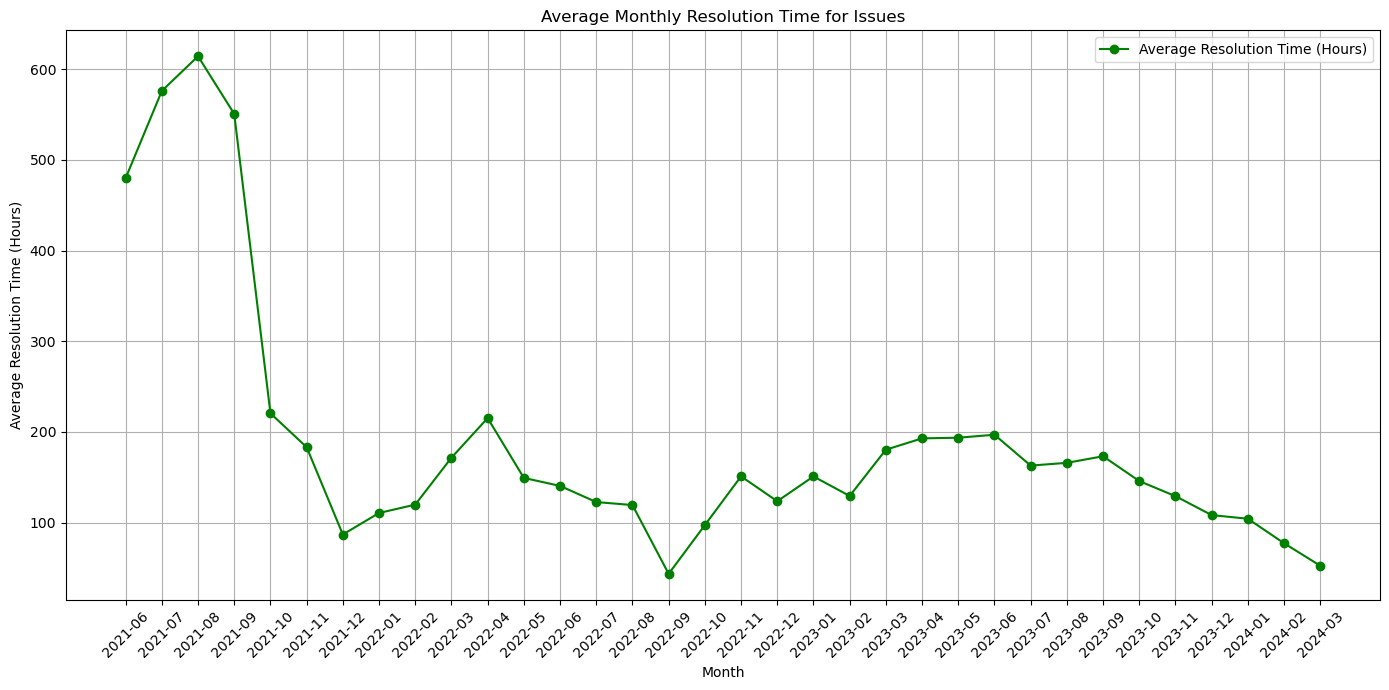

Average Monthly Resolution Time:
 Created_at_local
2021-06    479.862500
2021-07    576.058527
2021-08    614.336527
2021-09    550.656838
2021-10    220.539285
Freq: M, Name: Resolution_Time, dtype: float64


In [3]:
# Calculate the monthly average time taken to resolve issues
data['Resolution_Time'] = (data['Closed_at_local'] - data['Created_at_local']).dt.total_seconds() / 3600  # in hours
monthly_resolution_time = data.groupby(data['Created_at_local'].dt.to_period('M'))['Resolution_Time'].mean()

# Plot the average resolution time by month
plt.figure(figsize=(14, 7))
plt.plot(monthly_resolution_time.index.astype(str), monthly_resolution_time.values, label='Average Resolution Time (Hours)', marker='o', color='green')
plt.title('Average Monthly Resolution Time for Issues')
plt.xlabel('Month')
plt.ylabel('Average Resolution Time (Hours)')
plt.xticks(rotation=45)
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

# Print out the first few entries to check the calculation
print("Average Monthly Resolution Time:\n", monthly_resolution_time.head())


Observations:
There's a peak in resolution time around mid-2021, particularly from July to September, indicating that issues took longer to resolve during this period.
The resolution time steadily decreases afterwards, which could suggest process improvements, seasonal variation in issue types, or perhaps a decrease in the complexity or severity of issues.

Correlation Matrix:
                          Reported_Issues  Resolved_Issues  \
Reported_Issues                 1.000000         0.948265   
Resolved_Issues                 0.948265         1.000000   
Average_Resolution_Time        -0.439801        -0.557211   

                         Average_Resolution_Time  
Reported_Issues                        -0.439801  
Resolved_Issues                        -0.557211  
Average_Resolution_Time                 1.000000  


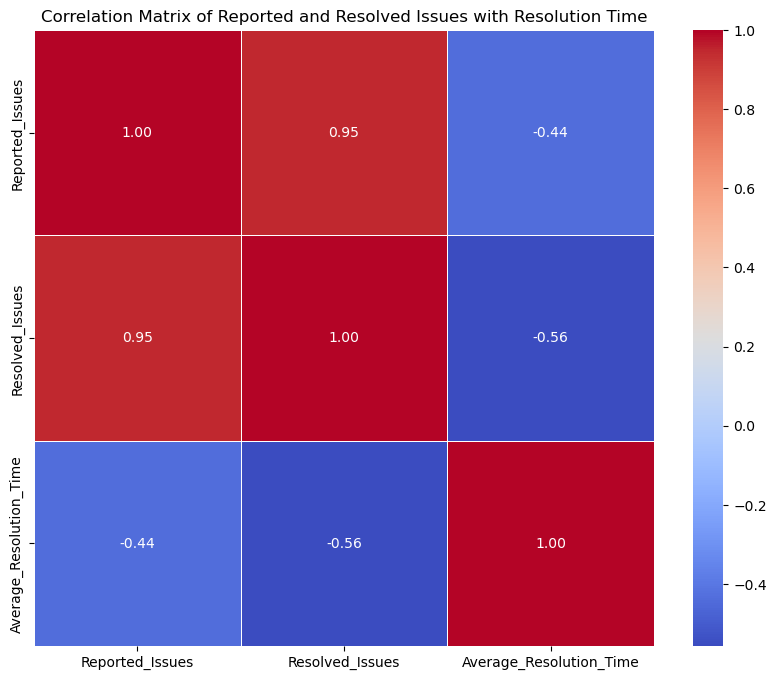

In [4]:
import numpy as np
import seaborn as sns
# Combine the data into a single DataFrame for analysis
analysis_df = pd.DataFrame({
    'Reported_Issues': monthly_reported,
    'Resolved_Issues': monthly_closed,
    'Average_Resolution_Time': monthly_resolution_time
})

# Drop any months with missing data to ensure accurate correlation calculation
analysis_df.dropna(inplace=True)

# Calculate and print the correlation matrix
correlation_matrix = analysis_df.corr()
print("Correlation Matrix:\n", correlation_matrix)

# Plot the correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('Correlation Matrix of Reported and Resolved Issues with Resolution Time')
plt.show()


Key Observations:
High Correlation Between Reported and Resolved Issues: A correlation of 0.95 indicates that there is a very strong relationship between the number of issues reported and the number resolved. This suggests that as more issues are reported, a similar increase in issue resolutions follows.

Reported Issues and Resolution Time: The correlation of -0.44 suggests that as the number of reported issues increases, the average resolution time slightly decreases. This could imply that with higher volumes, processes might be optimized or prioritized to handle the increase.

Resolved Issues and Resolution Time: The stronger negative correlation of -0.56 indicates a more pronounced effect of increased resolutions on reducing the average resolution time. This could be due to streamlined processes or more resources being allocated as the volume of resolutions increases.

In [5]:
# Calculate the resolution time for each issue in hours
data['Resolution_Time'] = (data['Closed_at_local'] - data['Created_at_local']).dt.total_seconds() / 3600

# Group the data by 'Agency_Name' and calculate the average resolution time
agency_performance = data.groupby('Agency_Name')['Resolution_Time'].mean().sort_values()

# Display the average resolution time per agency
print("Average Resolution Time by Agency (in hours):\n", agency_performance)


Average Resolution Time by Agency (in hours):
 Agency_Name
Water & Sewage                             89.303001
Animals                                    92.901042
Housing & Property Maintenance            108.846166
Garbage, Recycling & Graffiti             130.378372
Health, Safety & Social Services          235.751533
Parking & Vehicles                        237.694417
Sanitation Carts                          320.171082
Streets, Sidewalks & Transportation       381.188914
Feedback to the City                      551.682256
Green Spaces, Trees & Public Utilities    608.366765
Name: Resolution_Time, dtype: float64


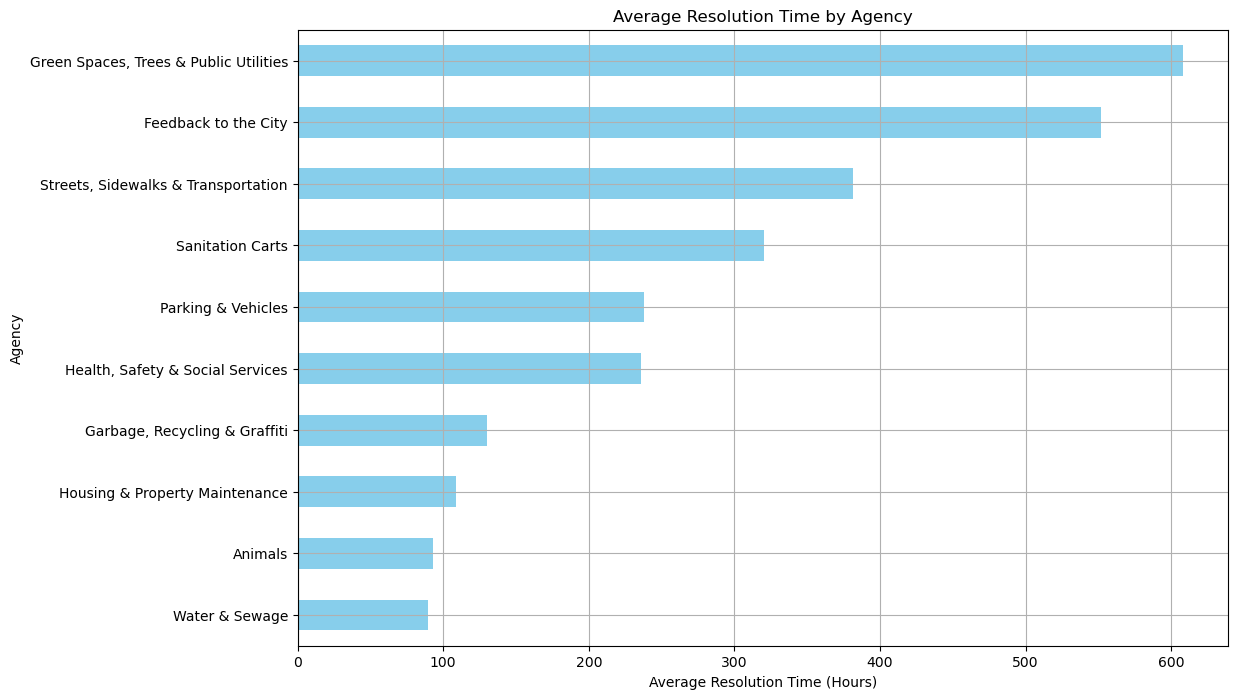

In [6]:
import matplotlib.pyplot as plt

# Plotting
plt.figure(figsize=(12, 8))
agency_performance.plot(kind='barh', color='skyblue')
plt.xlabel('Average Resolution Time (Hours)')
plt.ylabel('Agency')
plt.title('Average Resolution Time by Agency')
plt.grid(True)
plt.show()


The bar chart and the results clearly show significant differences in the average resolution time among the various agencies, with "Green Spaces, Trees & Public Utilities" taking the longest and "Water & Sewage" the shortest. 

Insights and Recommendations:
Significant Variation in Resolution Times: Agencies like "Green Spaces, Trees & Public Utilities" and "Feedback to the City" exhibit notably higher resolution times compared to others. This could be due to the nature of the issues they deal with, which may be more complex or less prioritized.

Potential Areas for Improvement: Agencies with longer average resolution times might benefit from process audits and efficiency improvements. It may also be helpful to investigate the types of issues these agencies are addressing to see if additional resources or specific changes in process are necessary.

Resource Allocation: Agencies with faster resolution times might serve as models for best practices. Their strategies could potentially be adapted to improve performance in slower agencies.

In [7]:
# Select top 3 agencies with the highest resolution times for detailed analysis
top_agencies = agency_performance.tail(3).index.tolist()

# Filter the data for these agencies
top_agency_data = data[data['Agency_Name'].isin(top_agencies)]

# Print the selected agencies
print("Selected Agencies for Detailed Analysis:", top_agencies)


Selected Agencies for Detailed Analysis: ['Streets, Sidewalks & Transportation', 'Feedback to the City', 'Green Spaces, Trees & Public Utilities']


In [8]:
# Group by agency and issue category, then calculate the average resolution time
issue_type_performance = top_agency_data.groupby(['Agency_Name', 'Category'])['Resolution_Time'].mean().sort_values()

# Display the average resolution time by issue type within these agencies
print("Average Resolution Time by Issue Type within Selected Agencies:\n", issue_type_performance)


Average Resolution Time by Issue Type within Selected Agencies:
 Agency_Name                             Category                                                                   
Feedback to the City                    Mayor's Office (Internal)                                                         0.775000
Streets, Sidewalks & Transportation     Snow & Ice                                                                       36.971343
Green Spaces, Trees & Public Utilities  Request a free street tree planting (City of Syracuse Property Owners Only)      66.803333
Feedback to the City                    Scooter and Bikeshare Feedback                                                   88.294444
Green Spaces, Trees & Public Utilities  Playground Equipment                                                            230.457778
Streets, Sidewalks & Transportation     Potholes                                                                        258.927832
                                 

<Figure size 1200x800 with 0 Axes>

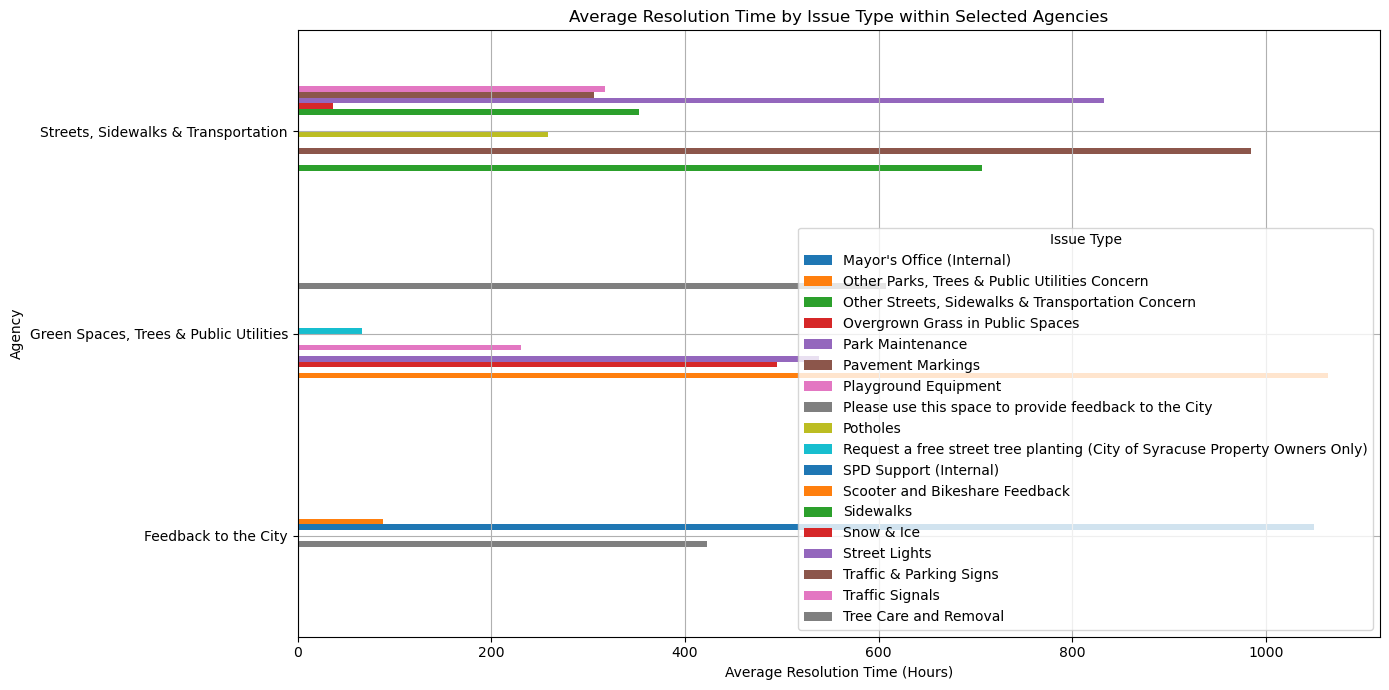

In [9]:
import matplotlib.pyplot as plt

# Plotting
plt.figure(figsize=(12, 8))
issue_type_performance.unstack().plot(kind='barh', figsize=(14, 7))
plt.xlabel('Average Resolution Time (Hours)')
plt.ylabel('Agency')
plt.title('Average Resolution Time by Issue Type within Selected Agencies')
plt.legend(title='Issue Type')
plt.grid(True)
plt.tight_layout()
plt.show()


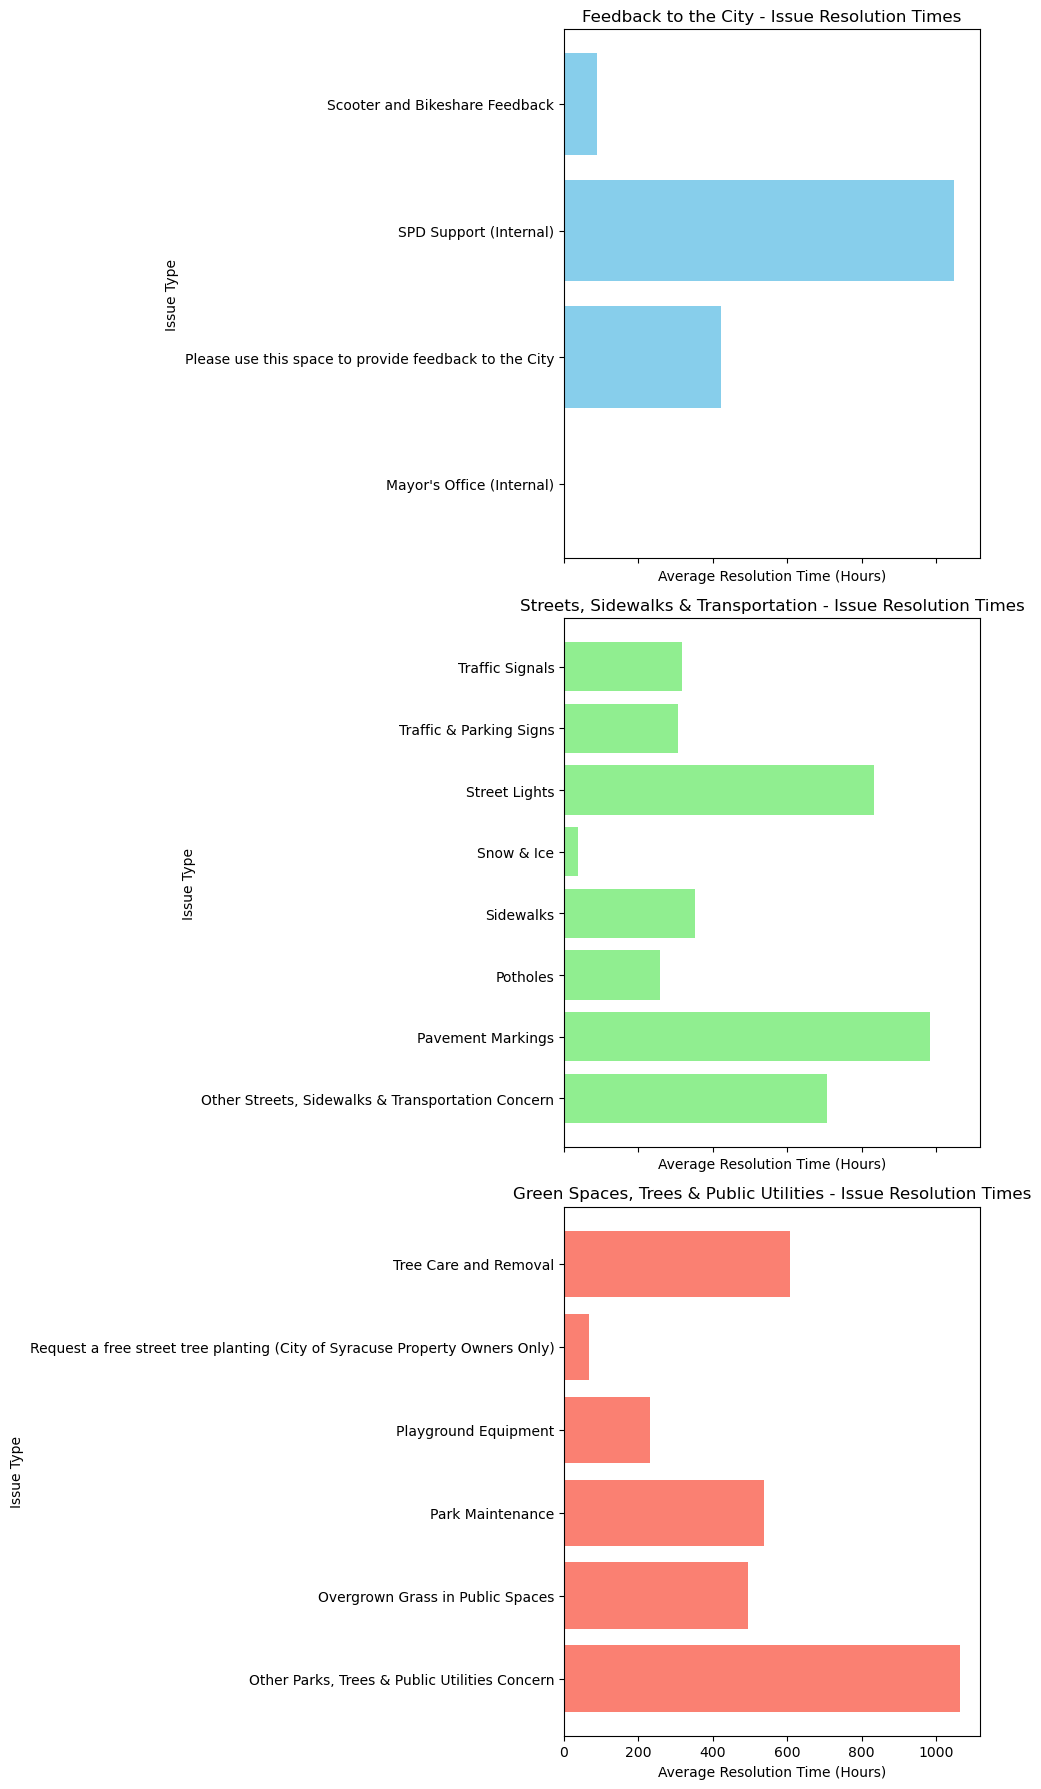

In [10]:
import matplotlib.pyplot as plt

# Filter data for each agency and prepare for plotting
data_feedback = top_agency_data[top_agency_data['Agency_Name'] == 'Feedback to the City'].groupby('Category')['Resolution_Time'].mean()
data_streets = top_agency_data[top_agency_data['Agency_Name'] == 'Streets, Sidewalks & Transportation'].groupby('Category')['Resolution_Time'].mean()
data_green_spaces = top_agency_data[top_agency_data['Agency_Name'] == 'Green Spaces, Trees & Public Utilities'].groupby('Category')['Resolution_Time'].mean()

# Create subplots
fig, ax = plt.subplots(nrows=3, ncols=1, figsize=(10, 18), sharex=True)

# Plot for Feedback to the City
ax[0].barh(data_feedback.index, data_feedback.values, color='skyblue')
ax[0].set_title('Feedback to the City - Issue Resolution Times')
ax[0].set_xlabel('Average Resolution Time (Hours)')
ax[0].set_ylabel('Issue Type')

# Plot for Streets, Sidewalks & Transportation
ax[1].barh(data_streets.index, data_streets.values, color='lightgreen')
ax[1].set_title('Streets, Sidewalks & Transportation - Issue Resolution Times')
ax[1].set_xlabel('Average Resolution Time (Hours)')
ax[1].set_ylabel('Issue Type')

# Plot for Green Spaces, Trees & Public Utilities
ax[2].barh(data_green_spaces.index, data_green_spaces.values, color='salmon')
ax[2].set_title('Green Spaces, Trees & Public Utilities - Issue Resolution Times')
ax[2].set_xlabel('Average Resolution Time (Hours)')
ax[2].set_ylabel('Issue Type')

# Adjust layout to prevent overlap
plt.tight_layout()

# Show the plot
plt.show()


In [11]:
import pandas as pd
import matplotlib.pyplot as plt

data = pd.read_csv('syracuse_requests.csv')
data.info()



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 60208 entries, 0 to 60207
Data columns (total 23 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   X                        60113 non-null  float64
 1   Y                        60113 non-null  float64
 2   Id                       60208 non-null  int64  
 3   Summary                  60208 non-null  object 
 4   Rating                   60208 non-null  int64  
 5   Address                  60113 non-null  object 
 6   Description              54580 non-null  object 
 7   Agency_Name              60208 non-null  object 
 8   Request_type             60208 non-null  int64  
 9   URL                      60208 non-null  object 
 10  Lat                      60113 non-null  float64
 11  Lng                      60113 non-null  float64
 12  Export_tagged_places     60112 non-null  object 
 13  Created_at_local         60208 non-null  object 
 14  Acknowledged_at_local 

In [12]:
missing_data = data.isnull().sum().sort_values(ascending=False)
missing_percentage = (missing_data / len(data)) * 100
missing_report = pd.DataFrame({'Missing Count': missing_data, 'Missing Percentage': missing_percentage})

print(missing_report)


                         Missing Count  Missing Percentage
Minutes_to_acknowledged          44905           74.583112
Acknowledged_at_local            44905           74.583112
Description                       5628            9.347595
Assignee_name                     1239            2.057866
Minutes_to_closed                  716            1.189211
Closed_at_local                    663            1.101183
Sla_in_hours                       399            0.662703
Export_tagged_places                96            0.159447
X                                   95            0.157786
Y                                   95            0.157786
Lng                                 95            0.157786
Lat                                 95            0.157786
Address                             95            0.157786
URL                                  0            0.000000
Created_at_local                     0            0.000000
Request_type                         0            0.0000

In [13]:
import pandas as pd

# Function to clean up the address
def clean_address(address):
    if not isinstance(address, str):
        return None
    address = address.lower()  # Convert to lower case
    address = ''.join([i for i in address if not i.isdigit()])  # Remove digits
    address = address.replace('syracuse', '')  # Remove the word 'syracuse'
    address = address.replace(',', '')  # Remove commas
    address = address.replace('new york', '')  # Remove "new york"
    address = address.replace('ny', '')  # Remove "ny"
    address = address.replace('usa', '')  # Remove "usa"
    address = address.replace('united states', '')  # Remove "united states"
    address = address.replace('united states of america', '')  # Remove "united states of america"
    address = address.replace('-', '')  # Remove hyphens
    address = ' '.join(address.split())  # Remove extra spaces and reformat
    return address.strip()

# Apply the function to your DataFrame
data['Street_Name'] = data['Address'].apply(clean_address)


data['Street_Name'].head(50)

0                                 
1                     s mcbride st
2                     s mcbride st
3                   buckingham ave
4                     w fayette st
5      e borden ave & garfield ave
6                         solar st
7                          plum st
8       craddock st & hillview ave
9                     bellevue ave
10                       stolp ave
11                        fitch st
12                        fitch st
13                     s geddes st
14               oak st & rugby rd
15                       dudley st
16                        roney rd
17                    bellevue ave
18                    bellevue ave
19                     s geddes st
20                         rich st
21         carbon st & lemoyne ave
22       w colvin st & midland ave
23           kirk ave & landon ave
24    n salina st & kirkpatrick st
25                     s salina st
26                      tallman st
27                        hope ave
28                  

In [14]:
# Dropping rows where Minutes_to_closed is missing
data_cleaned = data.dropna(subset=['Minutes_to_closed'])

# Dropping columns with a high proportion of missing values
data_cleaned = data_cleaned.drop(['Summary','X', 'Y','Minutes_to_acknowledged', 'Id', 'URL', 'ObjectId', 'Closed_at_local','Acknowledged_at_local', 'Address', 'Description', 'Export_tagged_places'], axis=1)

# Verifying the shape of the cleaned dataset
print(data_cleaned.shape)


(59492, 12)


In [15]:
data_cleaned['Minutes_to_closed'].isnull().sum()
data_cleaned.head(10)

,Rating,Agency_Name,Request_type,Lat,Lng,Created_at_local,Minutes_to_closed,Assignee_name,Category,Sla_in_hours,Report_Source,Street_Name
0,2,"Streets, Sidewalks & Transportation",33843,43.051296,-76.149810,06/15/2021 - 02:36PM,32918.0,Superintendent of Street Repair,Potholes,120.0,iPhone,
2,3,"Streets, Sidewalks & Transportation",33843,43.040916,-76.143751,06/15/2021 - 07:01PM,32692.0,Superintendent of Street Repair,Potholes,120.0,Web - Mobile,s mcbride st
3,2,Water & Sewage,33849,43.029249,-76.121212,06/15/2021 - 10:20PM,10177.0,NaN,Water-related Concerns,24.0,Portal,buckingham ave
4,2,Housing & Property Maintenance,33847,43.046929,-76.165836,06/15/2021 - 11:29PM,641.0,Director of Code Enforcement,Home & Building Maintenance,48.0,Portal,w fayette st
5,2,Housing & Property Maintenance,33847,43.028367,-76.142174,06/15/2021 - 11:30PM,636.0,Director of Code Enforcement,Home & Building Maintenance,48.0,Portal,e borden ave & garfield ave
6,2,"Streets, Sidewalks & Transportation",33843,43.056774,-76.157650,06/15/2021 - 11:33PM,10439.0,Superintendent of Street Repair,Potholes,120.0,Portal,solar st
7,2,Water & Sewage,33849,43.051720,-76.160518,06/15/2021 - 11:35PM,10101.0,NaN,Water-related Concerns,24.0,Portal,plum st
8,2,Water & Sewage,33849,43.020490,-76.162620,06/15/2021 - 11:37PM,957.0,NaN,Water-related Concerns,24.0,Portal,craddock st & hillview ave
9,2,"Streets, Sidewalks & Transportation",33863,43.032736,-76.178987,06/16/2021 - 10:39PM,203775.0,Street Lighting Manager,Street Lights,360.0,Portal,bellevue ave
10,2,"Streets, Sidewalks & Transportation",33863,43.030028,-76.177646,06/16/2021 - 10:41PM,90196.0,Street Lighting Manager,Street Lights,360.0,Portal,stolp ave


In [16]:


# Converting 'Created_at_local' to datetime format
data_cleaned['Created_at_local'] = pd.to_datetime(data_cleaned['Created_at_local'])

# Verifying the changes
print(data_cleaned.head())


/var/folders/p3/9s4dt0cj7t9cx3md223g8wh40000gn/T/ipykernel_13876/3820002225.py:2: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  data_cleaned['Created_at_local'] = pd.to_datetime(data_cleaned['Created_at_local'])


   Rating                          Agency_Name  Request_type        Lat  \
0       2  Streets, Sidewalks & Transportation         33843  43.051296   
2       3  Streets, Sidewalks & Transportation         33843  43.040916   
3       2                       Water & Sewage         33849  43.029249   
4       2       Housing & Property Maintenance         33847  43.046929   
5       2       Housing & Property Maintenance         33847  43.028367   

         Lng    Created_at_local  Minutes_to_closed  \
0 -76.149810 2021-06-15 14:36:00            32918.0   
2 -76.143751 2021-06-15 19:01:00            32692.0   
3 -76.121212 2021-06-15 22:20:00            10177.0   
4 -76.165836 2021-06-15 23:29:00              641.0   
5 -76.142174 2021-06-15 23:30:00              636.0   

                     Assignee_name                     Category  Sla_in_hours  \
0  Superintendent of Street Repair                     Potholes         120.0   
2  Superintendent of Street Repair                     P

In [17]:
# Converting 'Created_at_local' to datetime format
data_cleaned['Created_at_local'] = pd.to_datetime(data_cleaned['Created_at_local'], format='%m/%d/%Y - %I:%M%p')

# Feature engineering: Extracting date and time features
data_cleaned['Hour_of_day'] = data_cleaned['Created_at_local'].dt.hour
data_cleaned['Day_of_week'] = data_cleaned['Created_at_local'].dt.dayofweek
data_cleaned['Month'] = data_cleaned['Created_at_local'].dt.month

# Dropping the original 'Created_at_local' column
data_cleaned = data_cleaned.drop('Created_at_local', axis=1)

# Verifying the changes
data_cleaned.head()


,Rating,Agency_Name,Request_type,Lat,Lng,Minutes_to_closed,Assignee_name,Category,Sla_in_hours,Report_Source,Street_Name,Hour_of_day,Day_of_week,Month
0,2,"Streets, Sidewalks & Transportation",33843,43.051296,-76.149810,32918.0,Superintendent of Street Repair,Potholes,120.0,iPhone,,14,1,6
2,3,"Streets, Sidewalks & Transportation",33843,43.040916,-76.143751,32692.0,Superintendent of Street Repair,Potholes,120.0,Web - Mobile,s mcbride st,19,1,6
3,2,Water & Sewage,33849,43.029249,-76.121212,10177.0,NaN,Water-related Concerns,24.0,Portal,buckingham ave,22,1,6
4,2,Housing & Property Maintenance,33847,43.046929,-76.165836,641.0,Director of Code Enforcement,Home & Building Maintenance,48.0,Portal,w fayette st,23,1,6
5,2,Housing & Property Maintenance,33847,43.028367,-76.142174,636.0,Director of Code Enforcement,Home & Building Maintenance,48.0,Portal,e borden ave & garfield ave,23,1,6


In [18]:
# Dropping rows where any of the important columns contain missing values
columns_with_missing = [ 'Lat', 'Lng', 'Sla_in_hours', 'Assignee_name']
data_cleaned = data_cleaned.dropna(subset=columns_with_missing)

# Verifying that no missing values remain
missing_data = data_cleaned.isnull().sum().sort_values(ascending=False)
missing_percentage = (missing_data / len(data_cleaned)) * 100
missing_report = pd.DataFrame({'Missing Count': missing_data, 'Missing Percentage': missing_percentage})

print(missing_report)


                   Missing Count  Missing Percentage
Rating                         0                 0.0
Agency_Name                    0                 0.0
Request_type                   0                 0.0
Lat                            0                 0.0
Lng                            0                 0.0
Minutes_to_closed              0                 0.0
Assignee_name                  0                 0.0
Category                       0                 0.0
Sla_in_hours                   0                 0.0
Report_Source                  0                 0.0
Street_Name                    0                 0.0
Hour_of_day                    0                 0.0
Day_of_week                    0                 0.0
Month                          0                 0.0


In [19]:

# Group the data by 'Category' and calculate mean, min, and max for 'Minutes_to_closed'
category_stats = data_cleaned.groupby('Category')['Minutes_to_closed'].agg(['mean', 'min', 'max'])

# Resetting the index to make 'Category' a column again for better display
category_stats.reset_index(inplace=True)

# Renaming columns for clarity
category_stats.columns = ['Category', 'Average Minutes to Closed', 'Minimum Minutes to Closed', 'Maximum Minutes to Closed']

# Display the DataFrame
print("Statistics for Minutes to Closed for Each Category:")
category_stats


Statistics for Minutes to Closed for Each Category:


,Category,Average Minutes to Closed,Minimum Minutes to Closed,Maximum Minutes to Closed
0,Animal Control,8605.944444,3.0,64555.0
1,Cart Broken,24801.198347,0.0,178991.0
2,Cart Feedback,45690.111111,0.0,260726.0
3,Cart Not Delivered,12705.429175,0.0,253835.0
4,Cart Stolen,16797.942211,58.0,150626.0
...,...,...,...,...
59,Vacant Buildings,4561.110629,0.0,125137.0
60,Vacant Land,8820.065972,0.0,315209.0
61,Water-related Concerns,79597.997375,0.0,518213.0
62,Weekly Trash Pickup,11717.690194,0.0,344192.0


In [20]:
# import pandas as pd
# import numpy as np

# # Calculate the first quartile and third quartile
# Q1 = data_cleaned['Minutes_to_closed'].quantile(0.25)
# Q3 = data_cleaned['Minutes_to_closed'].quantile(0.75)
# IQR = Q3 - Q1

# # Define bounds for outliers
# lower_bound = Q1 - 1.5 * IQR
# upper_bound = Q3 + 1.5 * IQR

# # Identifying outliers
# outliers = data_cleaned[(data_cleaned['Minutes_to_closed'] < lower_bound) | (data_cleaned['Minutes_to_closed'] > upper_bound)]

# # Display outliers
# print(f"Lower Bound for Outliers: {lower_bound}")
# print(f"Upper Bound for Outliers: {upper_bound}")
# print(f"Number of Outliers: {outliers.shape[0]}")
# print("Outliers in 'Minutes_to_closed':")
# outliers


In [21]:
data_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
Index: 58543 entries, 0 to 60207
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Rating             58543 non-null  int64  
 1   Agency_Name        58543 non-null  object 
 2   Request_type       58543 non-null  int64  
 3   Lat                58543 non-null  float64
 4   Lng                58543 non-null  float64
 5   Minutes_to_closed  58543 non-null  float64
 6   Assignee_name      58543 non-null  object 
 7   Category           58543 non-null  object 
 8   Sla_in_hours       58543 non-null  float64
 9   Report_Source      58543 non-null  object 
 10  Street_Name        58543 non-null  object 
 11  Hour_of_day        58543 non-null  int32  
 12  Day_of_week        58543 non-null  int32  
 13  Month              58543 non-null  int32  
dtypes: float64(4), int32(3), int64(2), object(5)
memory usage: 6.0+ MB


In [22]:
# Count total rows in the dataset
total_rows = data_cleaned.shape[0]

# Count rows where 'Minutes_to_closed' is negative
negative_minutes_count = (data_cleaned['Minutes_to_closed'] < 0).sum()

# Display the counts
print(f"Total number of rows in the dataset: {total_rows}")
print(f"Number of rows with negative 'Minutes to Closed': {negative_minutes_count}")


Total number of rows in the dataset: 58543
Number of rows with negative 'Minutes to Closed': 0


In [23]:
# Extract unique values from categorical columns

# Assuming `data_cleaned` contains your preprocessed dataset before one-hot encoding
agencies = data_cleaned['Agency_Name'].unique().tolist()
assignees = data_cleaned['Assignee_name'].unique().tolist()
categories = data_cleaned['Category'].unique().tolist()
report_sources = data_cleaned['Report_Source'].unique().tolist()

# Display the unique values for each categorical variable

print("Agencies:", agencies)
print("Assignees:", assignees)
print("Categories:", categories)
print("Report Sources:", report_sources)


Agencies: ['Streets, Sidewalks & Transportation', 'Housing & Property Maintenance', 'Garbage, Recycling & Graffiti', 'Green Spaces, Trees & Public Utilities', 'Animals', 'Parking & Vehicles', 'Water & Sewage', 'Health, Safety & Social Services', 'Feedback to the City', 'Sanitation Carts']
Assignees: ['Superintendent of Street Repair', 'Director of Code Enforcement', 'Street Lighting Manager', 'Division of Code Enforcement', 'Department of Public Works- DC', 'Public Works Inspector- SP', 'Superintendent of Street Cleaning', 'Superintendent of Environmental Services', 'Asst. Director of Blighted Structures', 'Sanitation_KT', 'Forestry - Parks', 'Transportation: Charles G. Traffic Sign Foreman', 'Director of Building Maintenance and Operations', 'Superintendent of Grounds', 'Director of Transportation Planning', 'Community Police', 'Transportation: Mike W. Traffic Signals Foreman', 'Superintendent of Sewers', 'Control Center Attendant-DH', 'Cityline Operator - T', 'City Arborist', 'Cityli

In [ ]:
import joblib
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split, cross_val_predict
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# One-hot encoding for categorical columns
categorical_columns = ['Street_Name', 'Agency_Name', 'Assignee_name', 'Category', 'Report_Source']
print("Starting one-hot encoding...")
data_cleaned = pd.get_dummies(data_cleaned, columns=categorical_columns, drop_first=True)
print("One-hot encoding completed.")

# Splitting the data into features (X) and target (y)
print("Splitting data into training and testing sets...")
X = data_cleaned.drop('Minutes_to_closed', axis=1)
y = data_cleaned['Minutes_to_closed']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print("Data split completed.")

# Apply Standard Scaler (Scaling the data)
print("Applying Standard Scaler...")
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)  # Scale the whole dataset for cross-validation
print("Scaling completed.")

# Save the scaler and columns for future use
print("Saving scaler and feature columns...")
joblib.dump(scaler, 'scaler.pkl')
joblib.dump(X.columns, 'columns.pkl')  # Save the feature columns used during training
print("Scaler and columns saved.")

# Prepare the Random Forest Regressor
print("Preparing Random Forest Regressor...")
rf_model = RandomForestRegressor(random_state=42, n_estimators=100)

# Generate cross-validated predictions for the entire dataset
print("Generating cross-validated predictions...")
cv_predictions = cross_val_predict(rf_model, X_scaled, y, cv=5)  # Using 5-fold cross-validation
data_cleaned['CV_Expected_Minutes_to_Close'] = cv_predictions
print("Cross-validated predictions added to the DataFrame.")

# Train the model on the entire dataset for deployment (optional based on use case)
rf_model.fit(X_scaled, y)
print("Model training completed on entire dataset.")

# Save the trained model for future use
print("Saving trained model...")
joblib.dump(rf_model, 'random_forest_model.pkl')
print("Model saved.")

# Optionally, you might still want to evaluate on a hold-out set
y_pred = rf_model.predict(X_scaled)
mae = mean_absolute_error(y, y_pred)
rmse = np.sqrt(mean_squared_error(y, y_pred))
r2 = r2_score(y, y_pred)
print(f"Random Forest - MAE: {mae:.2f}, RMSE: {rmse:.2f}, R²: {r2:.4f}")
print("Model evaluation completed.")


Starting one-hot encoding...
One-hot encoding completed.
Splitting data into training and testing sets...
Data split completed.
Applying Standard Scaler...
Scaling completed.
Saving scaler and feature columns...
Scaler and columns saved.
Preparing Random Forest Regressor...
Generating cross-validated predictions...


In [ ]:
# Get feature importance from the RandomForest model
importances = rf_model.feature_importances_
features = X_train.columns
feature_importance_df = pd.DataFrame({'Feature': features, 'Importance': importances}).sort_values(by='Importance', ascending=False)

# Plotting the top 20 important features
plt.figure(figsize=(10, 6))
feature_importance_df.head(20).plot(kind='bar', x='Feature', y='Importance', legend=False)
plt.title('Top 20 Feature Importances')
plt.show()


In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Function to convert minutes to days
def minutes_to_days(minutes):
    days = minutes / (24 * 60)
    return days

# Select 50 random instances from the test set
np.random.seed(42)  # For reproducibility
indices = np.random.choice(X_test_scaled.shape[0], size=50, replace=False)
actual_values = y_test.iloc[indices]
predicted_values = rf_model.predict(X_test_scaled[indices])

# Convert minutes to days for actual and predicted values
actual_days = minutes_to_days(actual_values)
predicted_days = minutes_to_days(predicted_values)

# Create a scatter plot
plt.figure(figsize=(10, 6))
plt.scatter(range(50), actual_days, color='blue', label='Actual Values', alpha=0.5)
plt.scatter(range(50), predicted_days, color='orange', label='Random Forest Predictions', alpha=0.5)
plt.xlabel('Index')
plt.ylabel('Days to Close')
plt.title('Random Forest: Actual vs Predicted Days to Close (50 Random Points)')
plt.legend()
plt.show()


In [ ]:
# Saving the DataFrame with the cross-validated predictions to a CSV file
data_cleaned.to_csv('data_with_predictions.csv', index=False)
print("DataFrame saved as 'data_with_predictions.csv'.")


In [ ]:
# from sklearn.model_selection import GridSearchCV

# # Define the parameter grid for Random Forest
# param_grid = {
#     'n_estimators': [100, 200, 300],  # Number of trees in the forest
#     'max_depth': [2,5,7,10],  # Maximum number of levels in each decision tree
#     'min_samples_split': [2, 5, 10],  # Minimum number of samples required to split an internal node
#     'min_samples_leaf': [1, 2, 4]  # Minimum number of samples required at each leaf node
# }

# # Create a GridSearchCV object
# grid_search = GridSearchCV(estimator=RandomForestRegressor(random_state=42),
#                            param_grid=param_grid,
#                            cv=3,  # Number of folds in cross-validation
#                            verbose=2,  # Controls the verbosity: the higher, the more messages
#                            n_jobs=-1,  # Number of jobs to run in parallel (-1 means using all processors)
#                            scoring='neg_mean_squared_error')  # Can choose other metrics such as 'r2'

# # Fit the grid search to the data
# print("Starting grid search...")
# grid_search.fit(X_train_scaled, y_train)
# print("Grid search completed.")

# # Best parameters and best score
# print("Best parameters found:")
# for param, value in grid_search.best_params_.items():
#     print(f"{param}: {value}")

# print("Best score (negative MSE) from grid search:", grid_search.best_score_)

# # Use the best estimator to make predictions
# print("Evaluating the best model from grid search...")
# best_rf_model = grid_search.best_estimator_
# y_pred = best_rf_model.predict(X_test_scaled)
# mae = mean_absolute_error(y_test, y_pred)
# rmse = np.sqrt(mean_squared_error(y_test, y_pred))
# r2 = r2_score(y_test, y_pred)

# print(f"Optimized Random Forest - MAE: {mae:.2f}, RMSE: {rmse:.2f}, R²: {r2:.4f}")

# # Save the best model for future use
# print("Saving the optimized model to 'optimized_random_forest_model.pkl'...")
# joblib.dump(best_rf_model, 'optimized_random_forest_model.pkl')
# print("Optimized model saved successfully.")


In [ ]:
# import joblib
# import pandas as pd
# import numpy as np
# import ipywidgets as widgets
# from IPython.display import display

# # Load the model, scaler, and columns
# model = joblib.load('random_forest_model.pkl')
# scaler = joblib.load('scaler.pkl')
# columns = joblib.load('columns.pkl')


# # Define original input columns before one-hot encoding
# original_columns = ['Street_Name', 'Agency_Name', 'Assignee_name', 'Category', 'Report_Source','Day_of_week', 'Month', 'Hour_of_day',  'Request_type']
# additional_columns = ['Lat', 'Lng', 'Sla_in_hours']  

# # Create widgets for the categorical features with free text input for more flexibility
# inputs = {col: widgets.Text(description=col + ':') for col in original_columns}

# # Create widgets for numerical inputs
# inputs.update({col: widgets.FloatText(description=col + ':', value=0.0) for col in additional_columns})

# # Button to make predictions
# predict_btn = widgets.Button(description="Predict Minutes to Closed")

# # Output widget to display results
# output = widgets.Output()

# def minutes_to_days_hours(minutes):
#     days = minutes // 1440
#     hours = (minutes % 1440) // 60
#     return days, hours

# def on_predict_clicked(b):
#     # Create a data frame with all zeros for one-hot columns
#     input_df = pd.DataFrame(columns=columns)
#     input_df.loc[0] = 0

#     # Handle free text categorical inputs by searching for matching encoded column
#     for col in original_columns:
#         input_value = inputs[col].value
#         matched_columns = [c for c in columns if c.startswith(col + '_') and c.endswith(input_value)]
#         if matched_columns:
#             input_df.at[0, matched_columns[0]] = 1

#     # Handle numerical inputs
#     for col in additional_columns:
#         input_df.at[0, col] = inputs[col].value

#     # Ensure all missing columns are filled with zeros
#     input_df = input_df.fillna(0)

#     # Scale the input
#     input_scaled = scaler.transform(input_df)

#     # Make prediction
#     prediction = model.predict(input_scaled)
    
#     # Convert prediction from minutes to days and hours
#     predicted_days, predicted_hours = minutes_to_days_hours(prediction[0])

#     # Display the prediction
#     output.clear_output()
#     with output:
#         print(f"Predicted Time to Closed: {predicted_days} days, {predicted_hours} hours")

# predict_btn.on_click(on_predict_clicked)

# # Display all widgets
# for widget in inputs.values():
#     display(widget)
# display(predict_btn)
# display(output)


# Best Performing Model is Random Forest! Simple yet effective